In [1]:
import cv2

In [2]:
import matplotlib.pyplot as plt

In [3]:
config_file = 'ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'
frozen_model  = 'frozen_inference_graph.pb'

In [4]:
model = cv2.dnn_DetectionModel(frozen_model, config_file)

In [5]:
ClassLabels = []
file_name = 'Labels.txt'
with open(file_name,'rt') as fpt:
    ClassLabels = fpt.read().rstrip('\n').split('\n')

In [6]:
print(ClassLabels)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [7]:
print(len(ClassLabels))

80


In [8]:
model.setInputSize(320, 320)
model.setInputScale(1.0/127.5) # 255 / 2 = 127.5
model.setInputMean((127.5, 127.5, 127.5)) # mobilenet => [-1, 1]
model.setInputSwapRB(True)

< cv2.dnn.Model 000001DE399D3D10>

# Read an Image

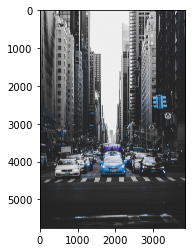

In [9]:
img = cv2.imread('john-arano-LzxsSWAVMYs-unsplash.jpg')
plt.imshow(img) ##bgr

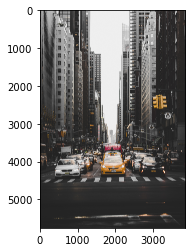

In [10]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [11]:
ClassIndex, confidence, bbox = model.detect(img, confThreshold=0.5)

In [12]:
print(ClassIndex)

[ 3  3  3  3  3  3 10  3  3 10  3  3  3 10  3  3 10  3  3  3  3  3  3]


In [13]:
font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN
for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidence.flatten(), bbox):
    cv2.rectangle(img, boxes, (255, 0, 0), 2)
    cv2.putText(img, ClassLabels[ClassInd-1], (boxes[0]+10, boxes[1]+40), font, fontScale=font_scale, color=(0, 255, 0), thickness=3)

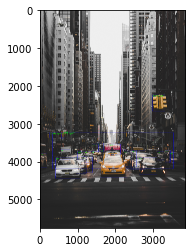

In [14]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

# Read Video

In [17]:
cap = cv2.VideoCapture('sample.mp4')
if not cap.isOpened():
    cap=cv2.VideoCapture(1)
if not cap.isOpened():
    raise IOError("Cannot open video")
    
font_scale=3
font= cv2.FONT_HERSHEY_PLAIN

while True:
    ret,frame =cap.read()
    
    classIndex, confidence, bbox = model.detect(frame, confThreshold=0.55)
    
    print(classIndex)
    if(len(classIndex)!=0):
        for ClassInd,conf,boxes in zip(classIndex.flatten(),confidence.flatten(), bbox):
            if(ClassInd<=80):
                cv2.rectangle(frame,boxes,(225,0,0),2)
                cv2.putText(frame ,ClassLabels[ClassInd-1],(boxes[0]+10,boxes[1]+40), font, fontScale=font_scale, color=(0,255,0),thickness=3)
    
    cv2.imshow("Object Detection", frame)
    
    if cv2.waitKey(2) & 0xFF ==ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

[3 3 3 3 1 4 3 6 6 3]
[3 3 3 3 4 1 3]
[3 3 3 3 1 3 4 6]
[3 3 3 3 3 1 1 3 3 3 6]
[3 3 3 3 3 3 3 3 3 3 1]
[3 3 3 3 3 3 3]
[3 3 3 3 3 3 3 3]
[ 3  3  3  3  3  3  3 10  3]
[3 3 3 3 3 3 3 3 3]
[3 3 3 3 3 3 1 3 3 1]
[3 3 3 3 3 1 3 3 3 3]
[3 3 3 3 1 3 3 3]
[3 3 1 3 3 3 3 1 3 3 1 1]
[3 3 3 3 1 1 3 3]
[3 3 3 3 1 1 3 3 1]
[3 3 3 3 1 1 3 1 3 3 1]
[3 3 3 3 1 1 3 3]
[3 3 3 3 1 1 3 3]
[3 3 3 3 1 3 3 1]
[3 3 1 3 3 1 3 1 3 1]
[3 3 3 3 1 1 3 3 1 1]
[3 3 3 1 3 1 1 3 1 3]
[3 3 3 3 1 1 1 3 3]
[3 3 3 3 1 1 1 3 3]
[3 3 3 1 3 1 1 3 1]
[3 3 3 3 1 1 1 3]
[3 3 3 3 1 1 3 1 1 3]
[3 3 3 3 1 1 3 1]
[3 3 3 3 1 3 3 1]
[3 3 3 3 1 3 1 3]
[3 3 3 3 1 3]
[3 3 3 3 1 1 3 1]
[3 3 3 3 1 3 1 1]
[3 3 3 3 1 3]
[3 3 3 3 3 1 1 1 1]
[3 3 3 3 1 3 1 1 1 1]
[3 3 3 3 3 1 1 1 1 3 1]
[3 3 3 3 3 1 1 1 1 1 3]
[3 3 3 3 3 1 1 1 1 1 3]
[3 3 3 3 1 1 1 1 3]
[3 3 3 3 1 1 3]
[3 3 3 3 1 1 1]
[3 3 3 3 1 3]
[3 3 3 3 1 1 3]
[3 3 3 3 1 1 3]
[3 3 3 3 1 3 3 1 1]
[3 3 3 3 3 3 1]
[3 3 3 3 3 3]
[3 3 3 3 3 3]
[3 3 3 3 3]
[3 3 3 3 3 1 1 1]
[3 3 3 3 3 1 1]
[3 

[ 3  3  3  3  3  3  3 10  3  1  3  3]
[ 3  3  3 10  3  3  3  3  3  3  3]
[ 3  3  3  3 10  3  3  1  3]
[ 3  3  3  3  3 10  1  3  3  3]
[ 3  3  3  3  3  1  3 10  3  3  3]
[ 3  3  3  3  3  3  3 10  3]
[ 3  3  3  3  3  3  3  3 10  1]
[3 3 3 3 3 3 3 3 1]
[3 3 3 3 3 3 3 3 3]
[ 3  3  3  3  3  3  3  1  3 10  1  3]
[ 3  3  1  3  3  3  3 10  3]
[ 3  3  3  3  1  3  3 10  3  3]
[ 3  3  3  3  1  3 10  3  3]
[ 3  3  3  3  1  1 10  3  3  3  3]
[ 3  3  1  3  3  1  3  3 10  3  3]
[ 3  3  3  3  3 10  3  3  3]
[3 3 3 3 3 1 3 3 1]
[ 3  3  3  1  3  3  3  1  3 10  3]
[3 3 1 3 3 1 3 3 3 3]
[3 3 3 3 1 3 3 1 3 3 3]
[3 3 3 1 3 3 3 1 3 3]
[3 3 3 3 1 3 3 1 3]
[3 3 3 3 1 3 1 3 3]
[3 3 3 3 3 1 1 3 3]
[ 3  3  3  3  1  3  3  1  3 10]
[ 3  3  3  3  3  1  3  3 10]
[ 3  3  3  1  3  3  3  1 10  3]
[ 3  3  3  3  3  3  1  3  1 10 10]
[3 3 3 3 3 3 1 3 3 1]
[ 3  3  3  3  3  3 10  1 10  3]
[ 3  3  3  3  3  3 10  1 10  3]
[ 3  3  3  3  3  3 10  3 10  1]
[ 3  3  3  3  3  3 10  1 10  1]
[ 3  3  3  3  3  3  1 10 10  1  3]
[ 3  3 

[3 3 3 3 3 1 3]
[3 3 3 3 3 3 3]
[ 3  3  3  3  3  3 10  3]
[ 3  3  3  3  3 10]
[ 3  3  3  3  3 10  3  3  3]
[ 3  3  3  3  3 10  3  3  1  1]
[ 3  3  3  3 10  1  3  3  3  3]
[ 3  3  3  1  3  1  3 10  3]
[ 3  3  3  3 10  3]
[ 3  3  3  1  1  3 10  3  1  1]
[ 3  3  3  1  3 10  3  1 10]
[ 3  3  3  3  1  3 10  3]
[ 3  3  3  3  3  1 10]
[ 3  3  3  3  3 10  3]
[ 3  3  3  3  3 10 10  3]
[3 3 3 3 1]
[ 3  3  3  3  3 10  3  3 10  1]
[ 3  3  3 10  3  3 10  3  3]
[ 3  3  3  3  3 10  3 10  1]
[ 3  3  3  3  1  3  1  1  1 10]
[3 3 3 3 3 3 1 1]
[ 3  3  3  3  3 10  3]
[ 3  3  3  3  3  3  3 10]
[ 3  3  3  3  3  3  3 10]
[ 3  3  3  3  3 10  3  1  3]
[ 3  3  3 10  3  3  1  3  1  3]
[ 3  3 10  3  3  3  1  3]
[ 3  3 10  3  3  3  3  1 10  1]
[ 3  3 10  3  3  3 10  3  3  1]
[ 3  3 10  3  3  3  1 10  1  1  3  1  3]
[ 3  3 10  3  3  3 10  1  3  3  1  1  3  3]
[ 3  3 10  3  3  1  1  3  1  3  3 10  1]
[ 3  3  3  3 10  3  3  3  1  1 10  1  1  3]
[ 3  3  3  3  3 10  3  3  1  1  3  1]
[ 3  3  3  3  3 10  3  3  3 10  3]


[ 3  3  1  3  3 10 10  3  4 10  3]
[ 3  3  3  1 10 10  3  3 10  4  3]
[ 3  3 10  3  1 10  3 10  3  8]
[ 3  3  3 10  1  3 10  3 10  8]
[ 3  3  1  3 10  3  3  8  3  3  3]
[ 3  3  1  8 10  3  3  3]
[ 3  3  1 10  8 10  3  3]
[ 3  3  1 10  3  4  3]
[ 3  3  3  1 10 10  3]
[ 3  3  3  1  3 10  3]
[ 3  3  3  1  3 10  3  3]
[ 3  3  3  1  3  3 10]
[3 3 3 1 3 3 3]
[3 3 3 1 3 3]
[3 3 3 3 1 1 3]
[3 3 3 3 1 1 3 3 3]
[3 3 3 1 1 8 3 3 3 3]
[3 3 3 1 3 1 3 3]
[3 3 3 3 1 1 3]
[3 3 3 3 1 1 3]
[3 3 3 1 3 1 3 8]
[3 3 3 1 3 3 1 8]
[3 3 3 1 8 3 3 1]
[3 3 1 8 1 3 3 6]
[3 3 1 3 3 1 3 3 3]
[3 3 3 1 8 3 4 1 3 8 3 3]
[3 3 3 3 1 3 8 4 3 3 4]
[3 3 3 3 8 1 3]
[3 3 3 8 3 1 3 4 3]
[3 3 3 8 3 3 8 3 1]
[3 3 3 8 3 1 3 4 3 3]
[3 3 3 8 3 3 1 3 4 3]
[3 3 3 3 8 3 1 3 3]
[3 3 3 3 3 1 3 8 4]
[3 3 3 3 3 1 8 3 8 3]
[3 3 3 3 3 3 1 8 3]
[3 3 3 3 1 3 8 3 8 3]
[3 3 3 3 3 1 3 4 4]
[3 3 3 3 1 3 3 3 4]
[3 3 3 3 3 1 3 3 3]
[3 3 3 3 3 3 3 3 1]
[3 3 3 3 3 3 3 3 1 1]
[3 3 3 3 3 3 3 1]
[3 3 3 3 3 3 1 1 3 1]
[3 3 3 1 3 3 1]
[3 3 3 1 3 3 3 1 3 

[3 3 3 3 3 3 3 3 1 3 3 3]
[3 3 3 3 3 3 3 3 3 3 3 1 3]
[3 3 3 3 3 3 3 3 1 3 3 3]
[3 3 3 3 3 3 1 3 3 3 3 3]
[3 3 3 3 3 1 3 3 3 3 3]
[3 3 3 3 3 1 3 3 3 3 3]
[3 3 3 3 3 3 1 3 3 3]
[3 3 3 3 3 1 3 3 3 3 3]
[3 3 3 3 3 3 1 3 3 3 3]
[3 3 3 3 3 3 3 1 3 3 3]
[3 3 3 3 3 3 3 1 3 3 3]
[3 3 3 3 3 3 3 1 3 3 3]
[3 3 3 3 3 3 3 3 3 3 1 3]
[3 3 3 3 3 3 3 3 3 1 3]
[3 3 3 3 3 3 3 3 3 1 3 3 3]
[3 3 3 3 3 3 3 3 1 3 3]
[3 3 3 3 3 3 3 3 1 3 3 3 3]
[3 3 3 3 3 3 3 3 3 3 1 3 3]
[3 3 3 3 3 3 3 3 3 3 3 1]
[3 3 3 3 3 3 3 3 3 3]
[3 3 3 3 3 3 3 3 1 3 3]
[3 3 3 3 3 3 3 3 3 1]
[3 3 3 3 3 3 3 1 3 3 1]
[3 3 3 3 3 3 3 3 1 3 1 3]
[3 3 3 3 3 3 3 1 3 3 1 3 3]
[3 3 3 3 3 3 3 3 3 1]
[3 3 3 3 3 3 3 1 3 3 3]
[3 3 3 3 3 3 1 3 3 3]
[3 3 3 3 3 3 1 3 3 3 3 3]
[3 3 3 3 3 3 1 3 1]
[3 3 3 3 3 1 3 3 3]
[3 3 3 3 1 3 3 3 1 3]
[3 3 3 3 1 3 3 3 3 3 3]
[3 3 3 3 3 1 3 3 3 1 3 1]
[3 3 3 3 3 3 1 3 3 1 3 3]
[3 3 3 3 3 3 1 3 1 3 3 3]
[3 3 3 3 3 1 3 3 1 3 3 3]
[3 3 3 3 3 3 1 3 3 3 3]
[3 3 3 3 3 1 3 3 3 1 3]
[ 3  3  3  3  3  3  1 10  3  3  1]
[ 3  3 

[4 3 1 1 4 3 3 3 4 3]
[1 4 1 3 3 1 3 3]
[3 4 1 1 4 3 3 3 4 6]
[3 4 1 1 4 4 1 3 1 3]
[1 3 1 4 4 4 3 1 3 3]
[4 1 1 4 3 3 4 1 3 3 3 3 1]
[4 1 4 1 3 3 4 3 3 3 1]
[4 1 4 3 1 4 3 3 3 3 3]
[4 1 1 3 4 3 3 3 3 3 1]
[4 3 1 1 4 3 4 3 3 3]
[3 4 3 1 4 4 3 3 3 1 3 3 3]
[1 4 3 3 4 4 1 3 3 3 3 3]
[1 4 4 3 4 1 3 3 3 3 1 8]
[1 4 3 3 1 4 3 4 3 3]
[1 4 3 1 4 3 3 4 3 3]
[1 1 4 3 4 3 3 3 3 3 4]
[1 4 3 1 3 3 3 4 4 3]
[1 4 1 3 3 3 4 4 3 3 1]
[1 4 1 3 3 3 4 3 4 3]
[4 1 3 1 3 3 3 4 3 3 4]
[4 1 1 3 3 3 3 3 4 3 1 4]
[4 1 1 3 3 3 3 3 4 3 4 3]
[4 1 1 3 3 3 3 3 4 3]
[4 1 1 4 4 3 3 3 3 3 3 3]
[4 1 1 3 3 3 3 3 3 4 3 4 3 1]
[4 1 3 3 3 1 3 3 3 3 3 4]
[4 1 1 3 3 3 4 3 3 3 3 1 3]
[4 3 1 3 3 1 4 3 3 3 1 3 3 3]
[3 4 1 3 3 1 3 3 3 3 1 4 3 3]
[3 4 1 3 3 3 3 1 3 4 3]
[3 3 4 1 4 3 1 3 3 3 3 3 3 3]
[4 4 3 1 3 3 1 3 3 3 3 3 8 3]
[1 3 4 4 3 3 3 1 3 4 3 3 3 3 8 3]
[1 4 4 3 3 3 3 1 4 3 3 8 3 3]
[1 3 4 3 4 3 1 3 3 3 4 8 3 3]
[4 3 4 1 3 3 1 3 4 3 3 3 8 3]
[4 1 3 3 1 4 3 3 3 3 3 3 3]
[4 1 1 3 4 3 3 3 3 3 3 3 3 8]
[4 1 4 1 3 3 3 3 3 3 3

error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'
